In [1]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Laboratorio # 8: Keras

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

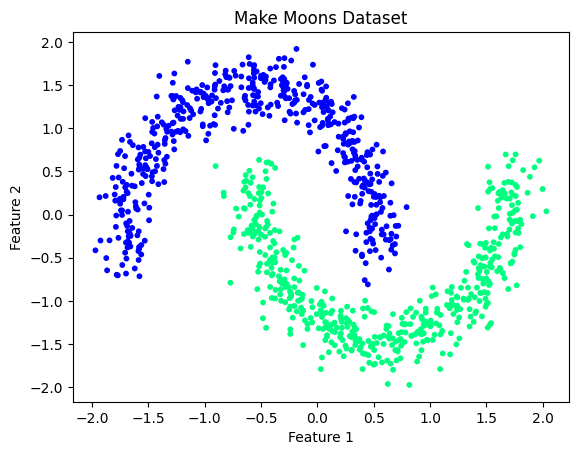

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# preprocesamiento de los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# construcción de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# visualización de los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Make Moons Dataset')
plt.show()

In [3]:
# construcción del modelo
def moonModel(activation = 'sigmoid', loss='binary_crossentropy'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(4, input_dim=2, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation = activation))
    opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model

In [4]:
tf.keras.backend.clear_session()
model = moonModel()
history = model.fit(X_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_test,y_test), verbose=0)

# evaluación del modelo
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

/Users/juanj_av/miniconda3/envs/AE/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Accuracy: 1.0000, Test Accuracy: 1.0000


Los conjuntos de entrenamiento y prueba tienen un accuracy de 1.0000 y 1.0000, respectivamente. Acontinuación se muestra el progreso del modelo conforme avanza el entrenamiento.

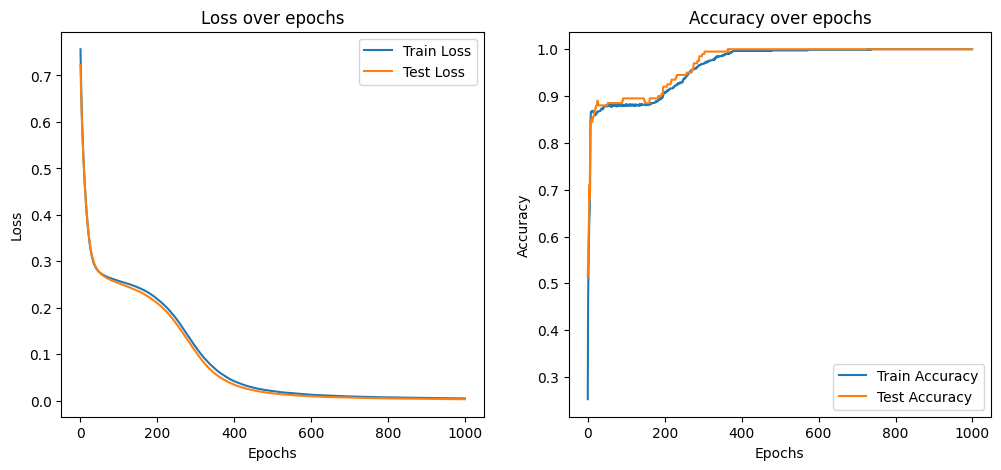

In [5]:
plt.figure(figsize=(12, 5))

# pérdida de entrenamiento y validación
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# precisión de entrenamiento y validación
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

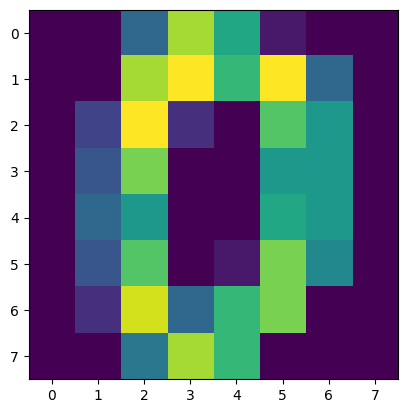

In [6]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

# visualización de los datos
plt.imshow(X[0].reshape(8, 8))

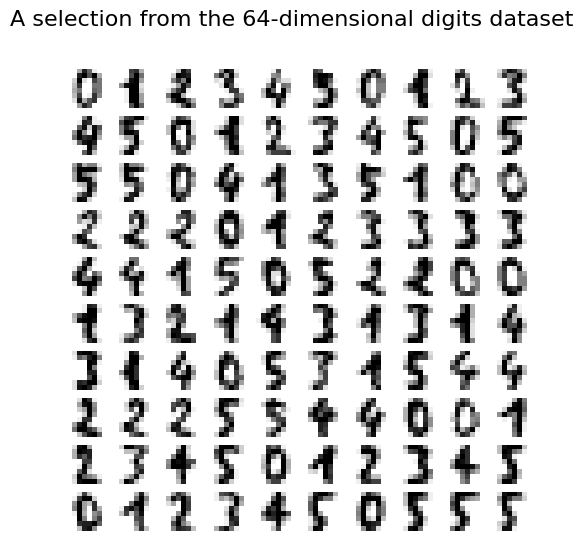

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# construcción del modelo
def digitsModel(activation = 'sigmoid', loss='categorical_crossentropy'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_dim=n_features, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(6, activation=activation))
    opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    return model

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

tf.keras.backend.clear_session()
model = digitsModel()
history = model.fit(X_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_test,y_test), verbose=0)

# evaluación
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Train Accuracy: 1.0000, Test Accuracy: 0.9908


Tal como se ve en el anterior resultado, el accuracy para los conjuntos de entrenamiento y prueba son bastante altos con un tiempo de ejecución muy bajo.

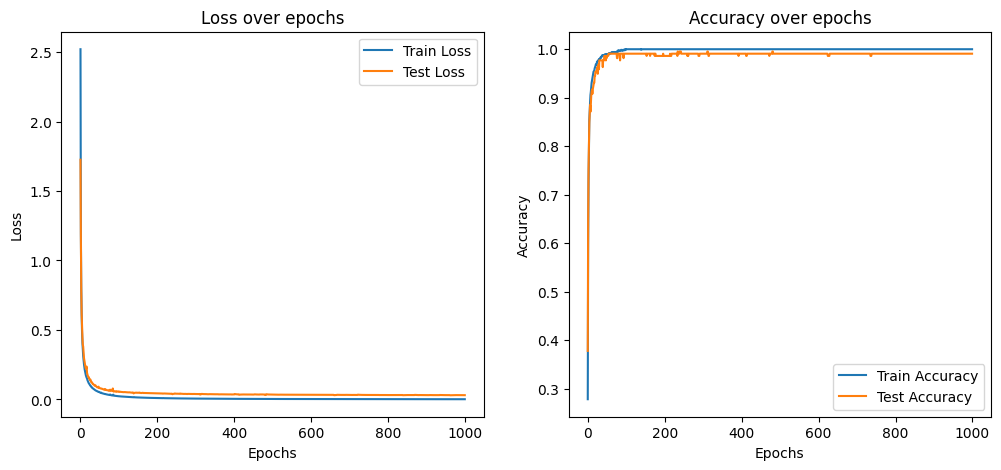

In [10]:
plt.figure(figsize=(12, 5))

# pérdida de entrenamiento y validación
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# precisión de entrenamiento y validación
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Juan José Pérez Avendaño